## O dataset

O dataset que será utilizado para este trabalho é o dataset "News Category Dataset", disponível no Kaggle: https://www.kaggle.com/datasets/rmisra/news-category-dataset

O dataset contém 210 mil notícias entre 2012 e 2022, retiradas do HuffPost, um tradicional agrupador de sites baseado nos Estados Unidos. Ele contém dados de notícias de mais de 42 categorias, sendo algumas delas: política; bem estar; viagens; estilo e beleza, entre outros.

Ele é composto dos seguintes atributos:

* category: categoria em que a notícia foi publicada.
* headline: título da notícia.
* authors: lista de autores.
* link: link para a notícia original.
* short_description: resumo da notícia.
* date: data de publicação.

Existem alguns detalhes deste dataset, como o fato de que existem cerca de 10 mil notícias entre 2018 e 2022, mas 200 mil entre 2012 e 2018.

Para diminuir a quantidade de dados que iremos processar, diminuindo o tempo, iremos lidar apenas com as notícias a partir de 2018, ou seja, num escopo de 10 mil notícias.

Citação: Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).

A seguir podemos visualizar algumas características desse dataset.

In [53]:
import pandas as pd
import numpy as np

In [54]:
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1KRD2LUgJzsFwXp9nsnN5hQvinr0WyzGd'

Downloading...
From: https://drive.google.com/uc?id=1KRD2LUgJzsFwXp9nsnN5hQvinr0WyzGd
To: /content/news_dataset.json
100% 87.3M/87.3M [00:02<00:00, 38.7MB/s]


In [55]:
!pip install matplotlib
!pip install pybind11>=2.12
!pip install openai==0.28

!pip install --upgrade huggingface_hub
!pip install --upgrade sentence-transformers

In [56]:
df = pd.read_json("/content/news_dataset.json",lines=True)

# Seleção das notícias apenas a partir de 2018, com o objetivo de dinamizar a execução deste projeto
df = df[df['date']> "2018-01-01"]
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [57]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

<Axes: xlabel='category'>

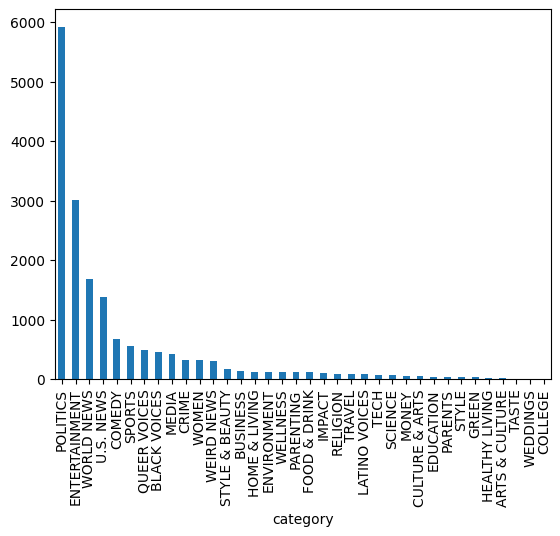

In [58]:
df['category'].value_counts().plot(kind="bar")

In [59]:
df['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING'], dtype=object)

## O projeto


Este projeto envolve algumas funcionalidades que podem ser úteis para a persona de um jornalista. A principal funcionalidade envolve a classificação de textos de notícias (títulos e resumos) em diferentes categorias. Entretanto, ele também será capaz de gerar os títulos e resumos a partir de um texto dado.

Ou seja, as seguintes funcionalidades serão apresentadas:

* Classificador de notícias
* Gerador de títulos
* Gerador de resumos

Temos como persona:

Você é um jornalista que precisa escrever notícias para o seu site. Mas você fica sempre com preguiça de avaliar quais são os temas que o seu texto se encaixa, se é um texto sobre política, sobre economia e etc. E você tem dificuldades em criar títulos que resumam bem o seu texto. Logo, você precisa de soluções que classifiquem o seu texto e lhe gerem esses títulos.

### Solução

A partir de uma nova notícia, o classificador deverá identificar a qual categoria ela pertence (e.g politics).

Como solução, foram utilizados modelos de Word Embeddings encontrados no HuggingFace. Esses modelos foram submetidos a fine-tunings para uma melhor acurácia. Posteriormente, os embeddings foram passados para um classificador KNN, responsável por classificar as notícias.

Este projeto obteve uma acurácia de X% para classificar notícias nos seguintes grupos: X,Y,Z

Para fins de comparação, um DummyClassifier obtem X% de acurácia nesse dataset.

### Demo

Uma demo deste projeto poderá ser encontrada no final deste notebook.



## Pré-processamento

A primeita etapa é o pré-processamento dos dados.

A primeira atividade realizada foi o agrupamento das categorias em apenas seis categorias. Essa redução foi realizada devido a distribuição não uniforme dos dados no conjunto de dados, como é possível visualizar no histograma acima.

Por meio da redução, foi possível tornar mais equilibrado a distribuição das categorias, sem que fosse necessário realizar a geração de novos textos,fator que poderia acabar enviesando o conjunto de dados.

Outras operações que foram realizadas foram:

* Seleção de notícias apenas a partir de 2018
* Transformação do texto em minúsculo
* Remoção de dados nulos
* Remoção de dados duplicados
* Remoção de categorias que não eram capazes de serem encaixadas em alguma das 6 categorias
* Agrupamento das colunas "short_description" e "headline" em uma única chamada "text", com o objetivo de melhorar a representação dos embeddings, dando mais contexto.

Um exemplo de categoria que não pode ser agrupada é "The WorldPost" e "WordPost" que envolvem uma plataforma de agrupamento de blogs.


### Embeddings

Outra etapa de processamento foi a criação dos embeddings, que serão detalhados posteriormente


category
POLITICS                   5921
ENTERTAINMENT              4663
NEWS                       3698
SOCIETY, CULTURE & ARTS    2841
Name: count, dtype: int64


<Axes: xlabel='category'>

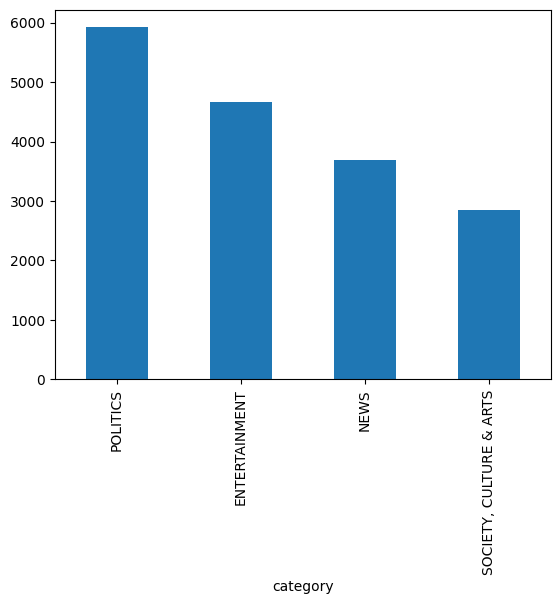

In [60]:
# Pre processings steps

# Removing null
df = df.dropna()

# Removing duplicate
df = df.drop_duplicates()

# Merging categories
categoriesToMerge = {
"U.S. NEWS": "NEWS",
"WORLD NEWS": "NEWS",
"GOOD NEWS": "NEWS",
"STYLE & BEAUTY": "SOCIETY, CULTURE & ARTS",
'FOOD & DRINK':"SOCIETY, CULTURE & ARTS",
"HEALTHY LIVING": "SOCIETY, CULTURE & ARTS",
"BLACK VOICES":"SOCIETY, CULTURE & ARTS",
"LATINO VOICES":"SOCIETY, CULTURE & ARTS",
"QUEER VOICES":"SOCIETY, CULTURE & ARTS",
"RELIGION":"SOCIETY, CULTURE & ARTS",
"ARTS & CULTURE":"SOCIETY, CULTURE & ARTS",
"ARTS":"SOCIETY, CULTURE & ARTS",
"PARENTS":"SOCIETY, CULTURE & ARTS",
"PARENTING":"SOCIETY, CULTURE & ARTS",
"WEDDINGS":"SOCIETY, CULTURE & ARTS",
"PARENTING":"SOCIETY, CULTURE & ARTS",
"HOME & LIVING":"SOCIETY, CULTURE & ARTS",
"DIVORCE":"SOCIETY, CULTURE & ARTS",
"TRAVEL":"SOCIETY, CULTURE & ARTS",
"COLLEGE":"SOCIETY, CULTURE & ARTS",
"MONEY":"SOCIETY, CULTURE & ARTS",
"BUSINESS":"SOCIETY, CULTURE & ARTS",
"CULTURE & ARTS":"SOCIETY, CULTURE & ARTS",
"MEDIA":"ENTERTAINMENT",
"COMEDY":"ENTERTAINMENT",
"WEIRD NEWS": "NEWS",
"TECH":"SOCIETY, CULTURE & ARTS",
"CRIME":"NEWS",
"WOMEN":"SOCIETY, CULTURE & ARTS",
"SPORTS": "ENTERTAINMENT",
"STYLE":"SOCIETY, CULTURE & ARTS",
"TASTE":"SOCIETY, CULTURE & ARTS",
"WELLNESS":"SOCIETY, CULTURE & ARTS",
"SCIENCE":"SOCIETY, CULTURE & ARTS",
"EDUCATION":"SOCIETY, CULTURE & ARTS",
"ENVIRONMENT":"SOCIETY, CULTURE & ARTS",
"ECONOMICS":"SOCIETY, CULTURE & ARTS",
"GREEN":"SOCIETY, CULTURE & ARTS"

}

df['category'] = df['category'].replace(categoriesToMerge)

# Dropping categories that aren't relevant
"""
Some categories are not relevant, such as 'The WorldPost' and 'WorldPost' which both relate to a specific media plataform.
"""
df = df[df['category'].str.contains("THE WORLDPOST|WORLDPOST|FIFTY|GREEN|IMPACT")==False]

# Dropping columns that aren't relevant to this analysis
df = df.drop(['link','date','authors'],axis='columns')


# New histogram
print(df['category'].value_counts())
df['category'].value_counts().plot(kind="bar")

In [61]:
# Merging headlines and short_description

df['text'] = df.apply(lambda row: f"Headline: {row['headline']}  Short_Description: {row['short_description']}", axis=1)
df['text'] = df['text'].apply(lambda x: x.lower())

df_text = df.drop(['headline','short_description'],axis='columns')
df_text

,category,text
0,NEWS,headline: over 4 million americans roll up sle...
1,NEWS,"headline: american airlines flyer charged, ban..."
2,ENTERTAINMENT,headline: 23 of the funniest tweets about cats...
3,"SOCIETY, CULTURE & ARTS",headline: the funniest tweets from parents thi...
4,NEWS,headline: woman who called cops on black bird-...
...,...,...
17220,POLITICS,headline: utah senator orrin hatch announces r...
17221,POLITICS,headline: first rikers island jail facility se...
17222,ENTERTAINMENT,headline: carrie underwood 'not quite looking ...
17223,"SOCIETY, CULTURE & ARTS",headline: 15 excellent british clothing brands...


## Embeddings

Uma etapa de grande importância para a mineração de dados é a criação de Word Embeddings.

Para isso, foi utilizado o modelo "sentence-transformers/all-MiniLM-L12-v2" disponível em https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2

Esse modelo mapeia sentenças e paragráfos para um espaço vetorial de 384 dimensões. Ele se mostrou um modelo leve e com uma boa acurácia nos testes realizados.

In [62]:
# Splitting into train and test

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_text, test_size=0.3, random_state=42)

df_test

,category,text
6501,NEWS,headline: california experienced back-to-back ...
13898,POLITICS,headline: trump’s national defense strategy: s...
2129,"SOCIETY, CULTURE & ARTS",headline: what to buy the 'ted lasso' fan in y...
11712,ENTERTAINMENT,headline: anna kendrick's strange suitcase sna...
13666,NEWS,headline: bollywood superstar sridevi dies at ...
...,...,...
2030,POLITICS,headline: jeanine pirro attacks biden for bein...
10670,ENTERTAINMENT,headline: 3rd-grader gives donald trump a less...
39,ENTERTAINMENT,headline: amazon greenlights 'blade runner 209...
15390,ENTERTAINMENT,headline: tom brady cuts off interview after h...


In [63]:
# Embedding with WordEmbedding model
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

# Create embeddings
df_train['embeddings'] = list(model.encode(df_train.text.to_list()))
df_test['embeddings'] = list(model.encode(df_test.text.to_list()))

df_test

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,category,text,embeddings
6501,NEWS,headline: california experienced back-to-back ...,"[-0.03743821, -0.0074461536, 0.04584075, 0.016..."
13898,POLITICS,headline: trump’s national defense strategy: s...,"[-0.0012428757, 0.06102756, -0.037440952, -0.1..."
2129,"SOCIETY, CULTURE & ARTS",headline: what to buy the 'ted lasso' fan in y...,"[-0.00022864593, 0.015420863, 0.14579116, 0.00..."
11712,ENTERTAINMENT,headline: anna kendrick's strange suitcase sna...,"[-0.09553554, 0.017778775, 0.08090772, 0.02386..."
13666,NEWS,headline: bollywood superstar sridevi dies at ...,"[0.027034603, -0.028405547, 0.0022402557, -0.0..."
...,...,...,...
2030,POLITICS,headline: jeanine pirro attacks biden for bein...,"[0.002102006, 0.020404594, -0.046510916, -0.05..."
10670,ENTERTAINMENT,headline: 3rd-grader gives donald trump a less...,"[0.019238211, 0.007893669, 0.011333569, -0.090..."
39,ENTERTAINMENT,headline: amazon greenlights 'blade runner 209...,"[-0.061850537, -0.034064215, 0.00011955632, -0..."
15390,ENTERTAINMENT,headline: tom brady cuts off interview after h...,"[-0.031177424, 0.036551643, -0.039798863, 0.04..."


## DummyClassifier

Para fins de comparação, primeiro iremos realizar a execução de um DummyClassifier para obtermos uma base de acurácia. Após isso, iremos realizar a execução do KNN e posterior tuning de hiperparâmetros.

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["category"])
y_target = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.3, random_state=42)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.34728440724158066


## KNN-Classifier

Primeiro iremos realizar uma execução básica do KNN com parâmetros básicos: K = 3 e métrica "cosine".

Essa execução serve para termos uma base de acurácia do KNN para posterior comparação com o tuning de hiperparâmetros.

Iremos ver que a acurácia obtida foi de 74%, já maior do que o Dummy.

In [65]:
# KNN Classifier - baseline

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric="cosine")
knn.fit(np.array(df_train.embeddings.to_list()), df_train['category'])
y_pred = knn.predict(np.array(df_test.embeddings.to_list()))
y_pred

array(['NEWS', 'POLITICS', 'SOCIETY, CULTURE & ARTS', ...,
       'ENTERTAINMENT', 'ENTERTAINMENT', 'NEWS'], dtype=object)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(df_test['category'], y_pred))

                         precision    recall  f1-score   support

          ENTERTAINMENT       0.73      0.85      0.78      1404
                   NEWS       0.73      0.65      0.69      1115
               POLITICS       0.79      0.84      0.81      1784
SOCIETY, CULTURE & ARTS       0.71      0.55      0.62       834

               accuracy                           0.75      5137
              macro avg       0.74      0.72      0.73      5137
           weighted avg       0.75      0.75      0.75      5137



### Busca dos melhores hiperparâmetros

In [67]:
# Busca dos melhores paramêtros e melhor quantidade de features

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

knn_clean = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_clean,
    param_grid={
        "n_neighbors":[n for n in range(2,10)],
        'metric':['cosine','euclidean','minkowski'],
        'weights':['uniform','distance']
    },
    scoring="accuracy",
    cv=3,
    error_score="raise"
)

grid_search.fit(df_train.embeddings.to_list(),df_train['category'])

print(grid_search.best_score_)
print(grid_search.best_estimator_)
print()


0.7638070277202527
KNeighborsClassifier(metric='cosine', n_neighbors=9, weights='distance')



### Execução do KNN com os melhores parâmetros

In [68]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,metric="cosine",weights='distance')
knn.fit(np.array(df_train.embeddings.to_list()), df_train['category'])
y_pred = knn.predict(np.array(df_test.embeddings.to_list()))
y_pred

scores = cross_val_score(knn, df_train.embeddings.to_list(),df_train['category'], cv=3)
print("Acc:", np.mean(scores))

print(classification_report(df_test['category'], y_pred))

Acc: 0.760386335438484
                         precision    recall  f1-score   support

          ENTERTAINMENT       0.79      0.84      0.82      1404
                   NEWS       0.78      0.65      0.71      1115
               POLITICS       0.78      0.89      0.83      1784
SOCIETY, CULTURE & ARTS       0.71      0.58      0.64       834

               accuracy                           0.78      5137
              macro avg       0.77      0.74      0.75      5137
           weighted avg       0.77      0.78      0.77      5137



## Resultados do KNN

Com os parâmetros de {k=x, metric="cosine", weights='distance'} obtivemos uma acurácia de X%, maior do que o Dummy.

Porém, com o objetivo de aumentarmos ainda mais a acurácia, iremos realizar o fine-tuning do modelo de Word Embedding.

In [69]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss')

# Treine o modelo
df_train['category'] = df_train['category'].replace({
    'ENTERTAINMENT':0,
    'NEWS':1,
    'POLITICS':2,
    'SOCIETY, CULTURE & ARTS':3
})

df_test['category'] = df_test['category'].replace({
    'ENTERTAINMENT':0,
    'NEWS':1,
    'POLITICS':2,
    'SOCIETY, CULTURE & ARTS':3
})

model.fit(df_train.embeddings.to_list(), df_train['category'])

# Faça previsões no conjunto de teste
y_pred = model.predict(df_test.embeddings.to_list())

# Avalie a performance
accuracy = accuracy_score(df_test['category'], y_pred)
report = classification_report(df_test['category'], y_pred)
print(report)

<ipython-input-69-c3fbaaa6dfe1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['category'] = df_train['category'].replace({
<ipython-input-69-c3fbaaa6dfe1>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['category'] = df_test['category'].replace({
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1404
           1       0.71      0.69      0.70      1115
           2       0.79      0.86      0.82      1784
           3       0.68      0.52      0.59       834

    accuracy                           0.75      5137
   macro avg       0.73      0.72      0.72      5137
weighted avg       0.75      0.75      0.75      5137



## LLM para Geração de Título e Resumo

In [70]:
!curl https://ollama.ai/install.sh | sh
!nohup ollama serve &> ollama.serve.log &
!cat ollama.serve.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13320    0 13320    0     0  37529      0 --:--:-- --:--:-- --:--:-- 37627
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [71]:
!nohup ollama run llama3.1 > llama3.1.log &
!cat llama3.1.log

nohup: redirecting stderr to stdout
⠙ 

In [72]:
import json
import openai

openai.api_key = "dummy"
openai.api_base = "http://127.0.0.1:11434/v1"



def llm_query(prompt):
  response = openai.ChatCompletion.create(
      model="llama3.1",
      messages = [{"role": "user", "content": prompt}]

  )
  s = response['choices'][0]['message']['content'].split("\n")

  return s

In [73]:
def embbedingInputText(text):
  print(f"Embedding do texto: {text}")
  model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
  return model.encode(text).reshape(1, -1)



def demo(text):

  prompt = """
  Pense que você é um jornalista que tem um artigo jornalístico escrito e precisa gerar um título e um resumo para a notícia. O título precisa conter poucas palavras e expressar bem o conteúdo da notícia. O resumo deve ser um texto com mais de vinte palavras que também resuma bem o conteúdo do artigo jornalístico.

  Você dever retornar o resultado na seguinte estrutura:

  titulo, resumo

  Retorne apenas uma lista contendo as duas strings e nada mais.

  Não gere outras categorias além dessas.

  Aqui estão alguns exemplos de título e resumos para você se basear:

  [Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters','Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.]
  ['American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video', 'He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."]

  Aqui está o texto para você gerar o título e um resumo:

  {text}

  Não gere nenhuma outra resposta além dessa
  """.format(text=text)

  queryResult = llm_query(prompt)
  print(type(queryResult))

  textToClassify = f"Headline: {queryResult[0]} Short_description: {queryResult[-1]}"

  textEmbbeded = embbedingInputText(textToClassify)
  result = knn.predict(np.array(textEmbbeded))
  return f"A categoria classificada é: {result}"




## Demo

Esta é uma demonstração do funcionamento do projeto.


Você deverá informar um texto na variável "user_input".

Após isso, você receberá como resultado o título e resumo da notícia (gerados por uma LLM) e a categoria daquela notícia (classificado pelo KNN).

Você irá encontrar abaixo dois textos de exemplo mas poderá criar o seu próprio

In [74]:
user_input = """
Um homem foi assassinado a tiros, no início da madrugada deste sábado (26), em Rio Bonito, na Região dos Lagos. Jonathan Silva Cardoso, o Joaninha, de 31 anos, foi executado em frente a um bar, na Avenida 7 de Maio, no Centro do município.

Segundo a polícia, ele tinha sido preso em 2019 por vários crimes e era suspeito de participação em uma milícia que atua em Itaboraí (veja mais abaixo os detalhes).

"Existem informações de que ele e familiares vinham sofrendo ameaças e algumas ações do tráfico de drogas de Itaboraí. Após ele sair da cadeia, ele saiu de Itaboraí e veio para Rio Bonito há 3 meses", disse o delegado Alexandre Netto, da 119ª DP (Rio Bonito), responsável pelas investigações.

Outras cinco pessoas foram baleadas durante a ação. Quatro foram levadas para o hospital, receberam atendimento e foram liberadas. A quinta vítima passou por cirurgia e está internada em estado grave no Hospital Regional Darcy Vargas, em Rio Bonito.
"""

In [75]:
user_input = """
Depois de uma campanha tensa e cheia de acusações, o último debate entre os candidatos à Prefeitura de São Paulo, exibido pela TV Globo na noite desta sexta-feira (25), foi cercado de apreensão, exaltação de familiares e alívio entre as equipes de campanha.

Os candidatos Ricardo Nunes (MDB) e Guilherme Boulos (PSOL) optaram por trazer toda a família para o último encontro entre os dois desse 2° turno, além de convidarem legião de políticos estrelados de São Paulo para acompanharem o debate ao vivo, do estúdio.

Entre os convidados estavam o governador Tarcísio de Freitas (Republicanos), os presidentes da Câmara Municipal (Milton Leite) e da Assembleia Legislativa (André do Prado), o presidente do TRE-SP (o desembargador Silmar Fernandes), além de presidentes de partidos, como Gilberto Kassab (PSD), que também é secretário de governo do estado de SP, e Ciro Nogueira (Progressistas).
"""

In [76]:
print(demo(user_input))

<class 'list'>
Embedding do texto: Headline: "Debate Tense e Convidado Mui Especial", O último debate entre Ricardo Nunes (MDB) e Guilherme Boulos (PSOL), transmitido pela TV Globo, reuniu toda a família dos candidatos ao evento que marcou o fim da disputa eleitoral no município. Além do concurso direto entre os dois precursores à Prefeitura de SP, outras equipes eleitorais foram bem representadas: governador Tarcísio de Freitas (Republicanos), presidentes da Câmara Municipal (Milton Leite) e da Assembleia Legislativa do estado (André do Prado), o presidente do TRE-SP (desembargador Silmar Fernandes) e também notáveis como Gilberto Kassab (PSD e secretário de governo no interior paulista). Short_description: "Debate Tense e Convidado Mui Especial", O último debate entre Ricardo Nunes (MDB) e Guilherme Boulos (PSOL), transmitido pela TV Globo, reuniu toda a família dos candidatos ao evento que marcou o fim da disputa eleitoral no município. Além do concurso direto entre os dois precurso

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


A categoria classificada é: ['NEWS']
